
# **PROJECT OVERVIEW**
This project involves analyzing house sales data for KingCounty Realtors. The goal is to provide insights and advice to homeowners in King County on 
buying and selling houses.

## **BUISNESS PROBLEM**

## **OBJECTIVE**

## **DATASET UNDERSTANDING**
#### **Understanding the columns in the dataset**
* **id** - unique identified for a house
* **Date** - house was sold
* **Price** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors



In [3]:
# Import relevant libraries to be used in the project
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import math
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

#### **1. Previewing the Data**

In [4]:
# Data loading using panda libraries
df = pd.read_csv("kc_house_data.csv")
# Getting the size of the dataset
df.shape

(21597, 21)

In [5]:
# preview of the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
# Getting an overview of the column with Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

* From the above the following columns have Null values *Waterfront* *View* *year Renovated*
* converting sqft_basement datatype from object to numeric

In [7]:
# convert square footage of the basement from object to numeric
df['sqft_basement'] = df['sqft_basement'].replace('?', pd.NA)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
# Getting the five discriptive statistics of data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
print("from the above statistics the mean price of houses is", df['price'].mean(), "\n with a standard deviation of ", df['price'].std() )

from the above statistics the mean price of houses is 540296.5735055795 
 with a standard deviation of  367368.1401013945


#### **2. Data Cleaning**
Data cleaning shall involve the following steps:
1. Check and resolve for duplicate values
2. Check and resolve for null values
3. Check and resolve for extraneous values
4. Perform further cleaning as needed

In [10]:
#FUNCTIONS TO BE USED DURING DATA CLEANING

#Function to get the number of duplictes
def get_duplicates(df):
    df=df[df.duplicated(keep=False)]
    return df

# Function to get extraneous values i.e. values that look like placeholders or are exaggerated values
def extraneous_values(df):
    for col in df.columns:
        print(col, '\n', df[col].value_counts(normalize=True), '\n')

# Function to calculate percentage of missing data in a column
def missing_data(df, column):
    length_of_df=len(df)                                                    #getting the length of the dataframe
    missing_data= column.isna().sum()                                       #total number of missing data in column foreign_gross
    percentage_of_missing_data = round((missing_data/length_of_df*100),2)   #percentage of missing data in the foreign_gross column
    return print(f"Percentage of Missing Data: {percentage_of_missing_data}""%")


**Check and resolve for duplicate values King County dataset**

In [11]:
# Checking for duplicate values.
get_duplicates(df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


**Check and resolve for null values in King West county dataset**

In [12]:
# Checking missing Data
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### **Checking the dates column for correct format**

In [13]:
# Checking format of all date time
df[['date', 'yr_renovated', 'yr_built']].sort_values(by='yr_renovated', ascending=False).head(10).reset_index()


,index,date,yr_renovated,yr_built
0,11587,5/22/2014,2015.0,1923
1,2293,7/28/2014,2015.0,1922
2,3153,3/31/2015,2015.0,1968
3,18560,7/1/2014,2015.0,1945
4,7090,10/28/2014,2015.0,1940
5,19429,5/1/2015,2015.0,1956
6,15673,10/6/2014,2015.0,1955
7,14845,6/6/2014,2015.0,1956
8,11621,4/6/2015,2015.0,1959
9,4236,3/27/2015,2015.0,1962


The date of the house sale is in a wrong format

In [14]:
#conversion of date of house sale to dtype datetime to confirm timeframe of dataset
df['date'] = pd.to_datetime(df["date"])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


##### **Percentage of missing data under column yr_renovated**

In [15]:
missing_data(df, df['yr_renovated'])

Percentage of Missing Data: 17.79%


##### **Observation:** 
From the above the percentage for missing values for year renovated is significantly high at 17% which would greatly affect the dataset therefore we replace it with the most occuring value in the same column i.e zero(0)


In [16]:
# Replacing NaN values in yr_renovated column
df["yr_renovated"].fillna(df["yr_renovated"].mode()[0], inplace= True)
df["yr_renovated"].value_counts()
len(df)

21597

##### **Percentage of missing data under column waterfront**

In [17]:
missing_data(df, df['waterfront'])

Percentage of Missing Data: 11.0%


##### **Observation:** 
The Null values account for 11% of the dataset. This constitutes a significant percentage of the dataset therefore instead of to dropping them the missing values for the 'waterfront' column were replaced by the modal value of 'waterfronts' for all houses that share the same 'zipcode'. This method effectively imputes missing data based on the most frequent value within the specified group(zipcodes).

In [18]:

# Function to replace nulls in column waterfront with the mode of waterfront for the same zipcode
def replace_null_with_mode(df, target_col, group_col):
    # Iterating through the rows with null values in the target column
    for index, row in df[df[target_col].isnull()].iterrows():
        # Getting the corresponding group value (zipcode)
        group_value = row[group_col]
        # Filtering the DataFrame to include only rows with the same group value and non-null target values
        filtered_df = df[(df[group_col] == group_value) & df[target_col].notnull()]
        # Getting the mode of the target column in the filtered DataFrame
        mode_value = filtered_df[target_col].mode()
        # Checking if mode_value is not empty
        if not mode_value.empty:
            # Replacing the null value with the mode value
            df.at[index, target_col] = mode_value[0]
    return df

# Replacing nulls in waterfront with the mode of waterfronts for the same zipcode
df = replace_null_with_mode(df, 'waterfront', 'zipcode')

len(df)


21597

##### **Percentage of missing data under column square footage of basement**

In [19]:
missing_data(df, df['sqft_basement'])

Percentage of Missing Data: 2.1%


##### **Observation:** 
From the above the percentage for missing values for square footage of basement is low at 2%% which would not greatly affect the dataset therefore the missing values were droped

In [20]:
# Droping missing record for year renovated
df = df.dropna()
df.isna().sum()
len(df)


21082

##### **Percentage of missing data under column of houses that have been viewed**

In [21]:
missing_data(df, df['view'])
len(df)

Percentage of Missing Data: 0.0%


21082

##### **Observation:** 
Due to the drop in the missing values for square footage of basement the percentatege of missing values for vies=wed houses has dropped to zero percent

In [22]:
## Drop unnessary columns
df.drop(columns=['id', 'lat', 'long'], inplace=True)

<ipython-input-22-2aa453624623>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['id', 'lat', 'long'], inplace=True)


##### **Final Cleaned Dataset form Missing Value:** 


In [23]:
df_clean_1 = df
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,1800,7503


##### **Splitting Categorical and Numeric**

In [24]:
# Splitting the columns based on variable types
categorical_columns = []
numerical_columns = []
for i in df.columns:
    if df[i].dtype == 'O':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
        
print(f"Categorical columns:",  categorical_columns) 
print(f"Numerical columns:",  numerical_columns) 

Categorical columns: ['waterfront', 'view', 'condition', 'grade']
Numerical columns: ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']


### **Exploratory Data Analysis**

#### **Distribution of Features**

In [25]:
# Defining histogram plots
def histogram_plot(df3, number_of_columns, columns_to_plot):

    # Creating subplots
    num_columns = len(columns_to_plot)

    # Number of rows and columns for subplots
    ncols = number_of_columns
    nrows = math.ceil(num_columns/ ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 40))
    axes = axes.flatten()

    # Plot each column using seaborn
    for i, col in enumerate(columns_to_plot):
        sns.histplot(df3[col], kde=False, ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle('Histograms of All Columns', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    return plt.show()

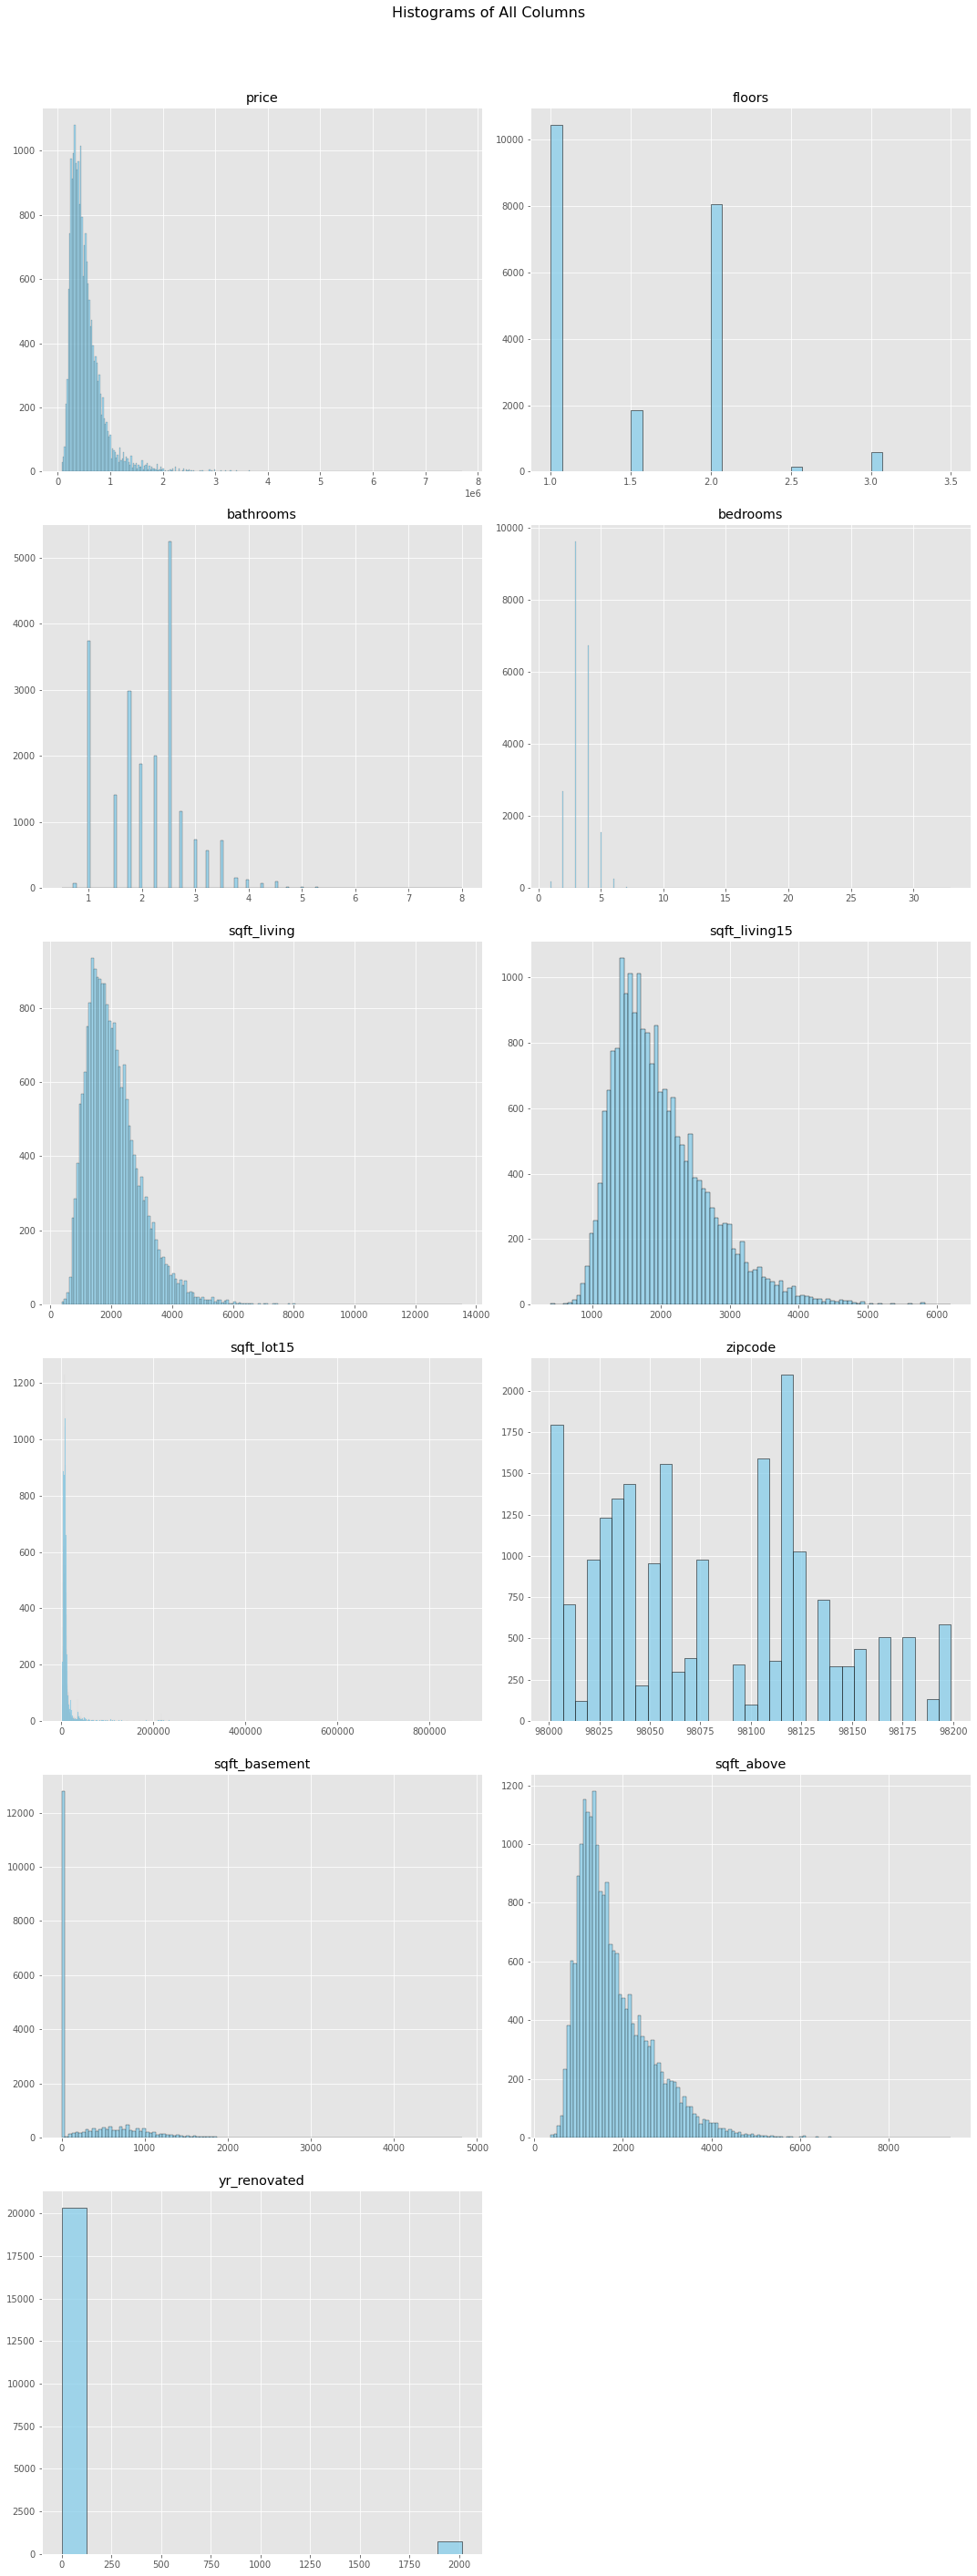

In [26]:
# Listing column to plot
columns_to_plot_ = ['price', 'floors', 
                    'bathrooms', 'bedrooms', 'sqft_living', 
                    'sqft_living15', 'sqft_lot15','zipcode',
                    'sqft_basement', 'sqft_above', 'yr_renovated']

# Plotting the histogram for the defined columns
histogram_plot(df_clean_1, 2, columns_to_plot_)

#### **Checking for Outliers**

In [27]:
# Outlier Analysis
# defining a function for plotting boxplot
def boxplot_graph(df1, number_of_columns, columns_to_plot):

    # Creating subplots
    num_columns = len(columns_to_plot)

    # Number of rows and columns for subplots
    ncols = number_of_columns
    nrows = math.ceil(num_columns/ ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 20))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plotting each column in a separate subplot
    for i, column in enumerate(columns_to_plot):
        sns.boxplot(y=df1[column], color="r", ax=axes[i])
        axes[i].set_title(column)

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust the layout to add space between rows
    plt.subplots_adjust(hspace=3) 

    plt.suptitle('Box Plots of Different Columns')
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
    return plt.show()




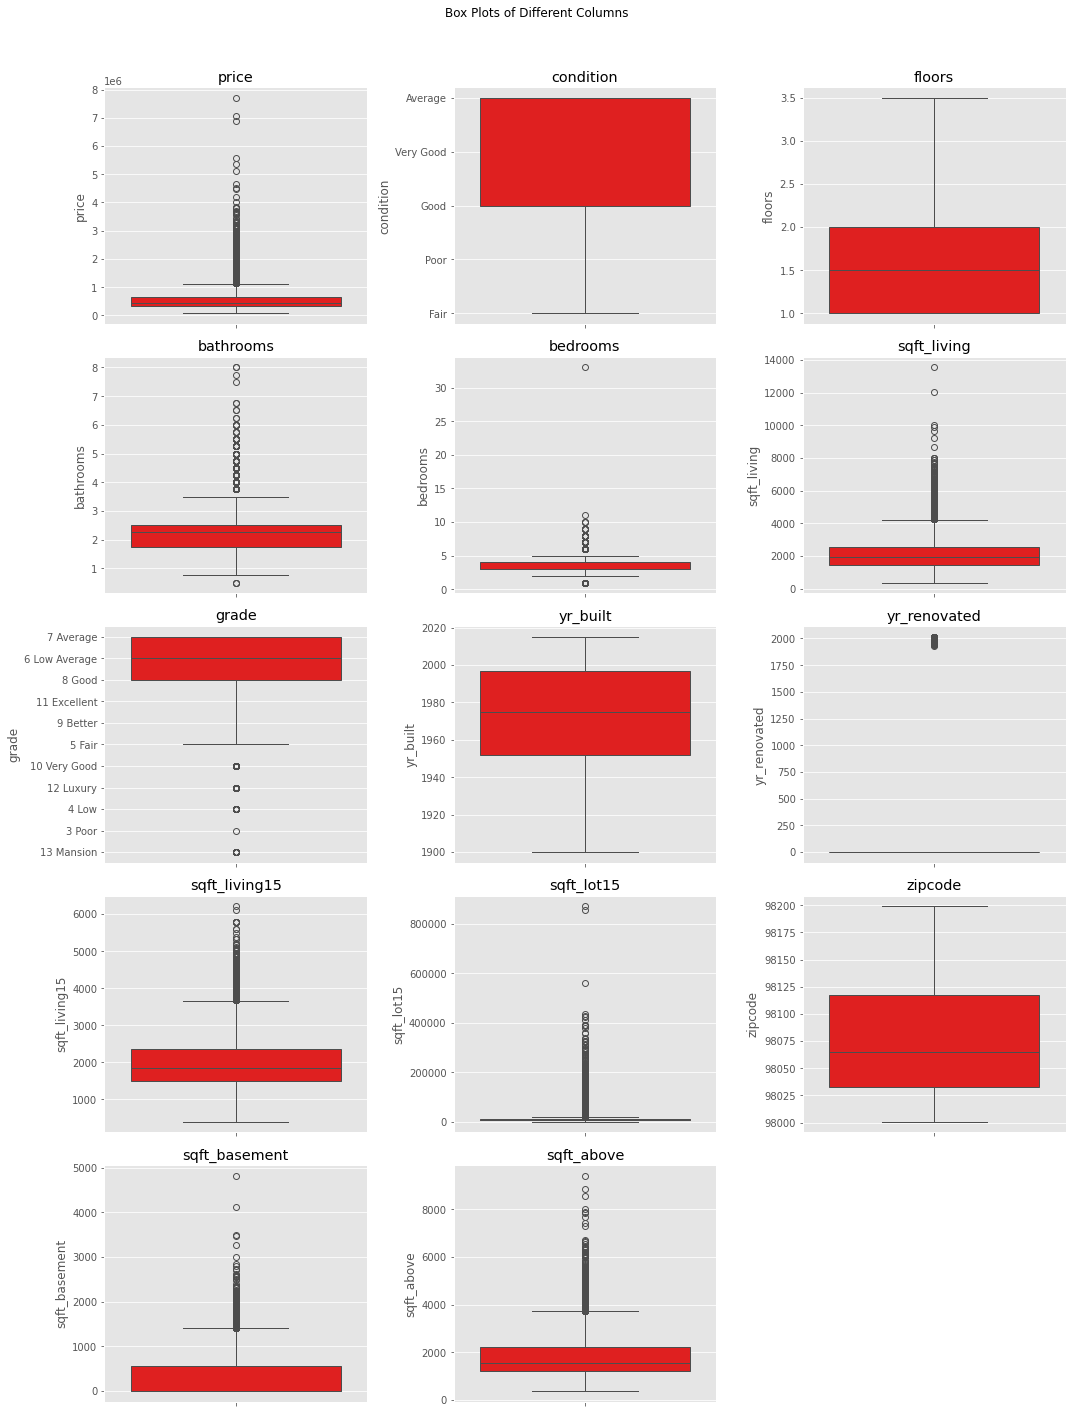

In [28]:
# Listing the columns to Plot
columns_to_plot_ = ['price', 'condition', 'floors', 
                    'bathrooms', 'bedrooms', 'sqft_living', 
                    'grade', 'yr_built', 'yr_renovated', 
                    'sqft_living15', 'sqft_lot15','zipcode',
                    'sqft_basement', 'sqft_above']

# Plotting the boxplot for the defined columns
boxplot_graph(df_clean_1, 3, columns_to_plot_)

##### **Columns and Interpretation:**

* Price: Shows the distribution of property prices. The majority of prices are clustered towards the lower end, with a few significant outliers indicating much higher prices.
* condition: Reflects the distribution of property conditions, categorized numerically. The majority of properties are in better condition, with fewer properties in poor condition.
* floors: Displays the number of floors in the properties. Most properties have between 1.5 and 2.5 floors.
* bathrooms: Indicates the distribution of the number of bathrooms. Most properties have around 2-3 bathrooms, with outliers having significantly more.
* bedrooms: Shows the distribution of the number of bedrooms. The majority have around 3 bedrooms, with a few properties having significantly more.
* sqft_living: Represents the square footage of the living area. The data is right-skewed with many * * outliers indicating larger properties.
* grade: Displays the distribution of property grades. Most properties are graded between 7 and 10.
* yr_built: Reflects the distribution of the years properties were built. Most properties were built in the mid to late 20th century.
* yr_renovated: Shows the distribution of renovation years. Most properties have not been renovated, as indicated by the clustering at the bottom.
* sqft_living15: Represents the square footage of living space in 2015. Similar to sqft_living, the data is right-skewed with several larger properties as outliers.
* sqft_lot15: Indicates the square footage of the lot in 2015. The data is highly right-skewed with many outliers representing larger lots

#### **Outlier Removal**

In [29]:
# Function to remove outliers
def remove_outliers(df2, columns):
    for column in columns:
        Q1 = df2[column].quantile(0.25)
        Q3 = df2[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df2 = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]
    return df2

In [30]:
# Remove outliers from the specified columns
df_clean_2 = remove_outliers(df_clean_1, ['price'])

# percentage of outliers removed
print("\033[1mThe percentage of outliers removed is", round((len(df_clean_1)-len(df_clean_2))/len(df_clean_1)*100), "%\033[0m")


The percentage of outliers removed is 5 %


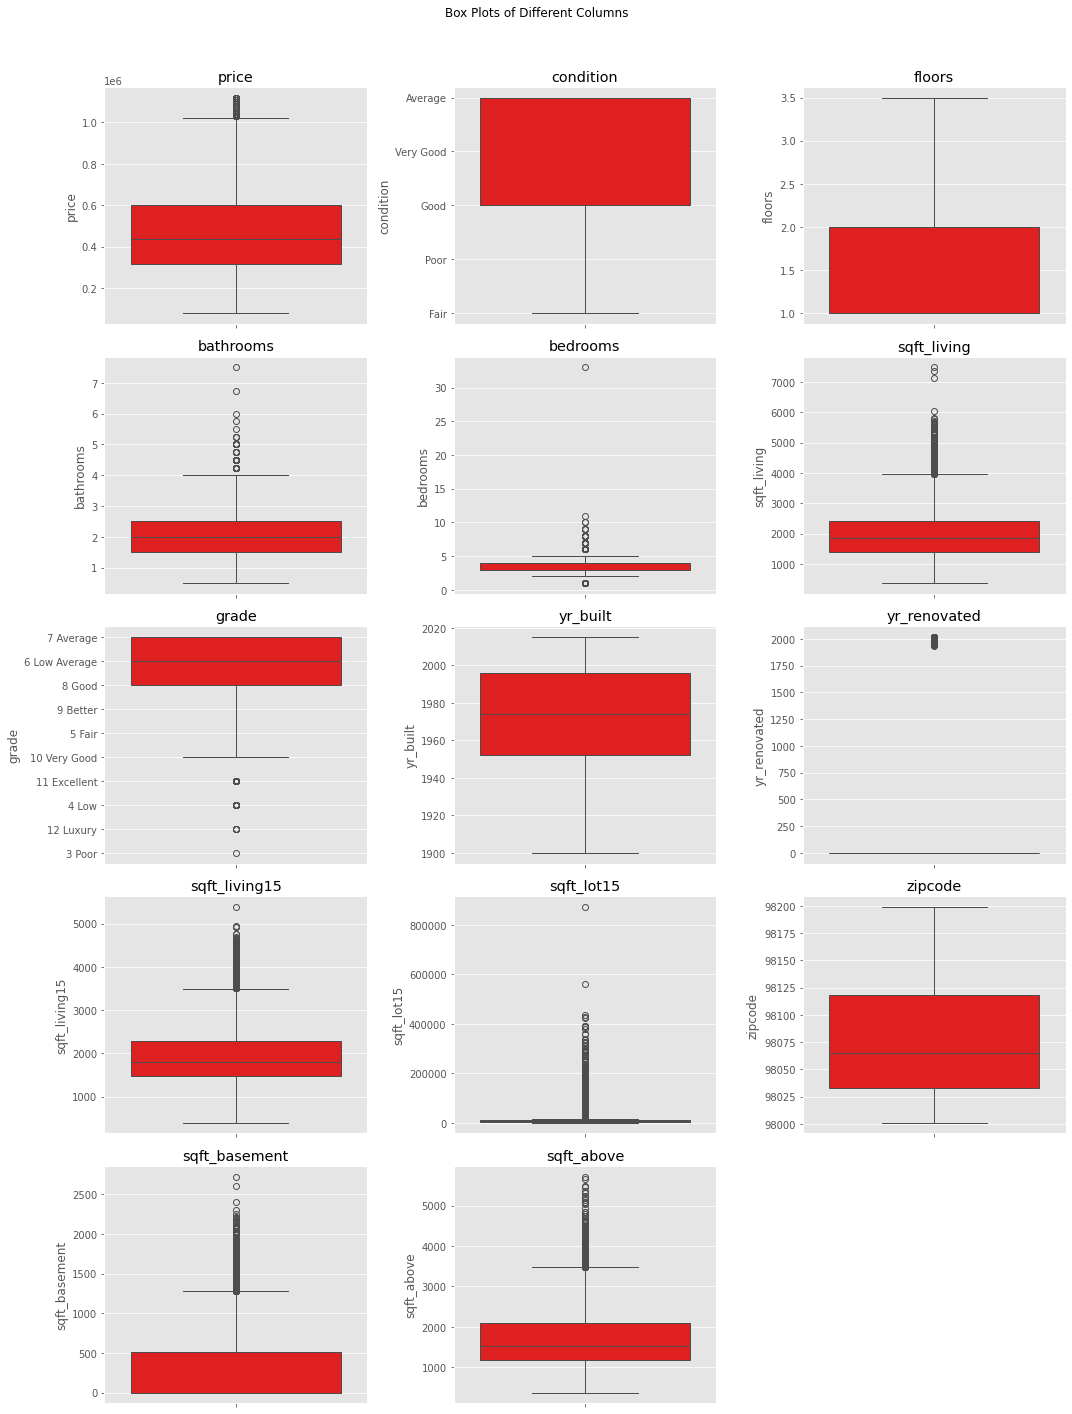

In [31]:
# Display the cleaned DataFrame
boxplot_graph(df_clean_2, 3, columns_to_plot_)

##### **Checking Outlier in Number of Bedrooms**

In [32]:
# Listing the number of bedrooms in descending order and identifying zipcode with the outlier number of bedrooms
df_clean_2 = df_clean_2.sort_values(by='bedrooms', ascending=False).reset_index(drop=True)
print(df_clean_2[['zipcode','bedrooms']])
print(df_clean_2.shape)

       zipcode  bedrooms
0        98103        33
1        98106        11
2        98006        10
3        98105        10
4        98144         9
...        ...       ...
19946    98168         1
19947    98117         1
19948    98126         1
19949    98125         1
19950    98003         1

[19951 rows x 2 columns]
(19951, 18)


#### **Observation**

one house has an extreneous value of 33 bedrooms. The value is replace by the median value all houses with the corresponding zipcodes

In [33]:

# Filtering locations with zipcode 98103 similar to the house with an outlier of 33 bedroms as shown above 
filtered_df = df_clean_2[df_clean_2['zipcode'] == 98103].reset_index()
filtered_df.sort_values(by='bedrooms', ascending=False).reset_index()

# getting the median value for houses in zipcode 98103
median_bedrooms = filtered_df['bedrooms'].median()
print('The median value for houses in zipcode 98103 is', median_bedrooms)
print('-------------------------')
# Zipcode and number of bedrooms in that zipcodes
print(filtered_df[['zipcode','bedrooms']])


# Replacing a the outlier house with outlier bedrooms with the median for the houses in the zicode
df_clean_2['bedrooms'] = df_clean_2['bedrooms'].replace(33, median_bedrooms)

#filtering zip code 98103
df_clean_3 = df_clean_2[df_clean_2['zipcode'] == 98103].reset_index()

print('-------------------------')

#rechecking shape of the cleaned dataframe
print(df_clean_3[['zipcode','bedrooms']])

df_clean_3.shape
df_clean_2.shape


The median value for houses in zipcode 98103 is 3.0
-------------------------
     zipcode  bedrooms
0      98103        33
1      98103         9
2      98103         7
3      98103         6
4      98103         6
..       ...       ...
568    98103         1
569    98103         1
570    98103         1
571    98103         1
572    98103         1

[573 rows x 2 columns]
-------------------------
     zipcode  bedrooms
0      98103         3
1      98103         9
2      98103         7
3      98103         6
4      98103         6
..       ...       ...
568    98103         1
569    98103         1
570    98103         1
571    98103         1
572    98103         1

[573 rows x 2 columns]


(19951, 18)


#### **Histogram plot after outlier removal**

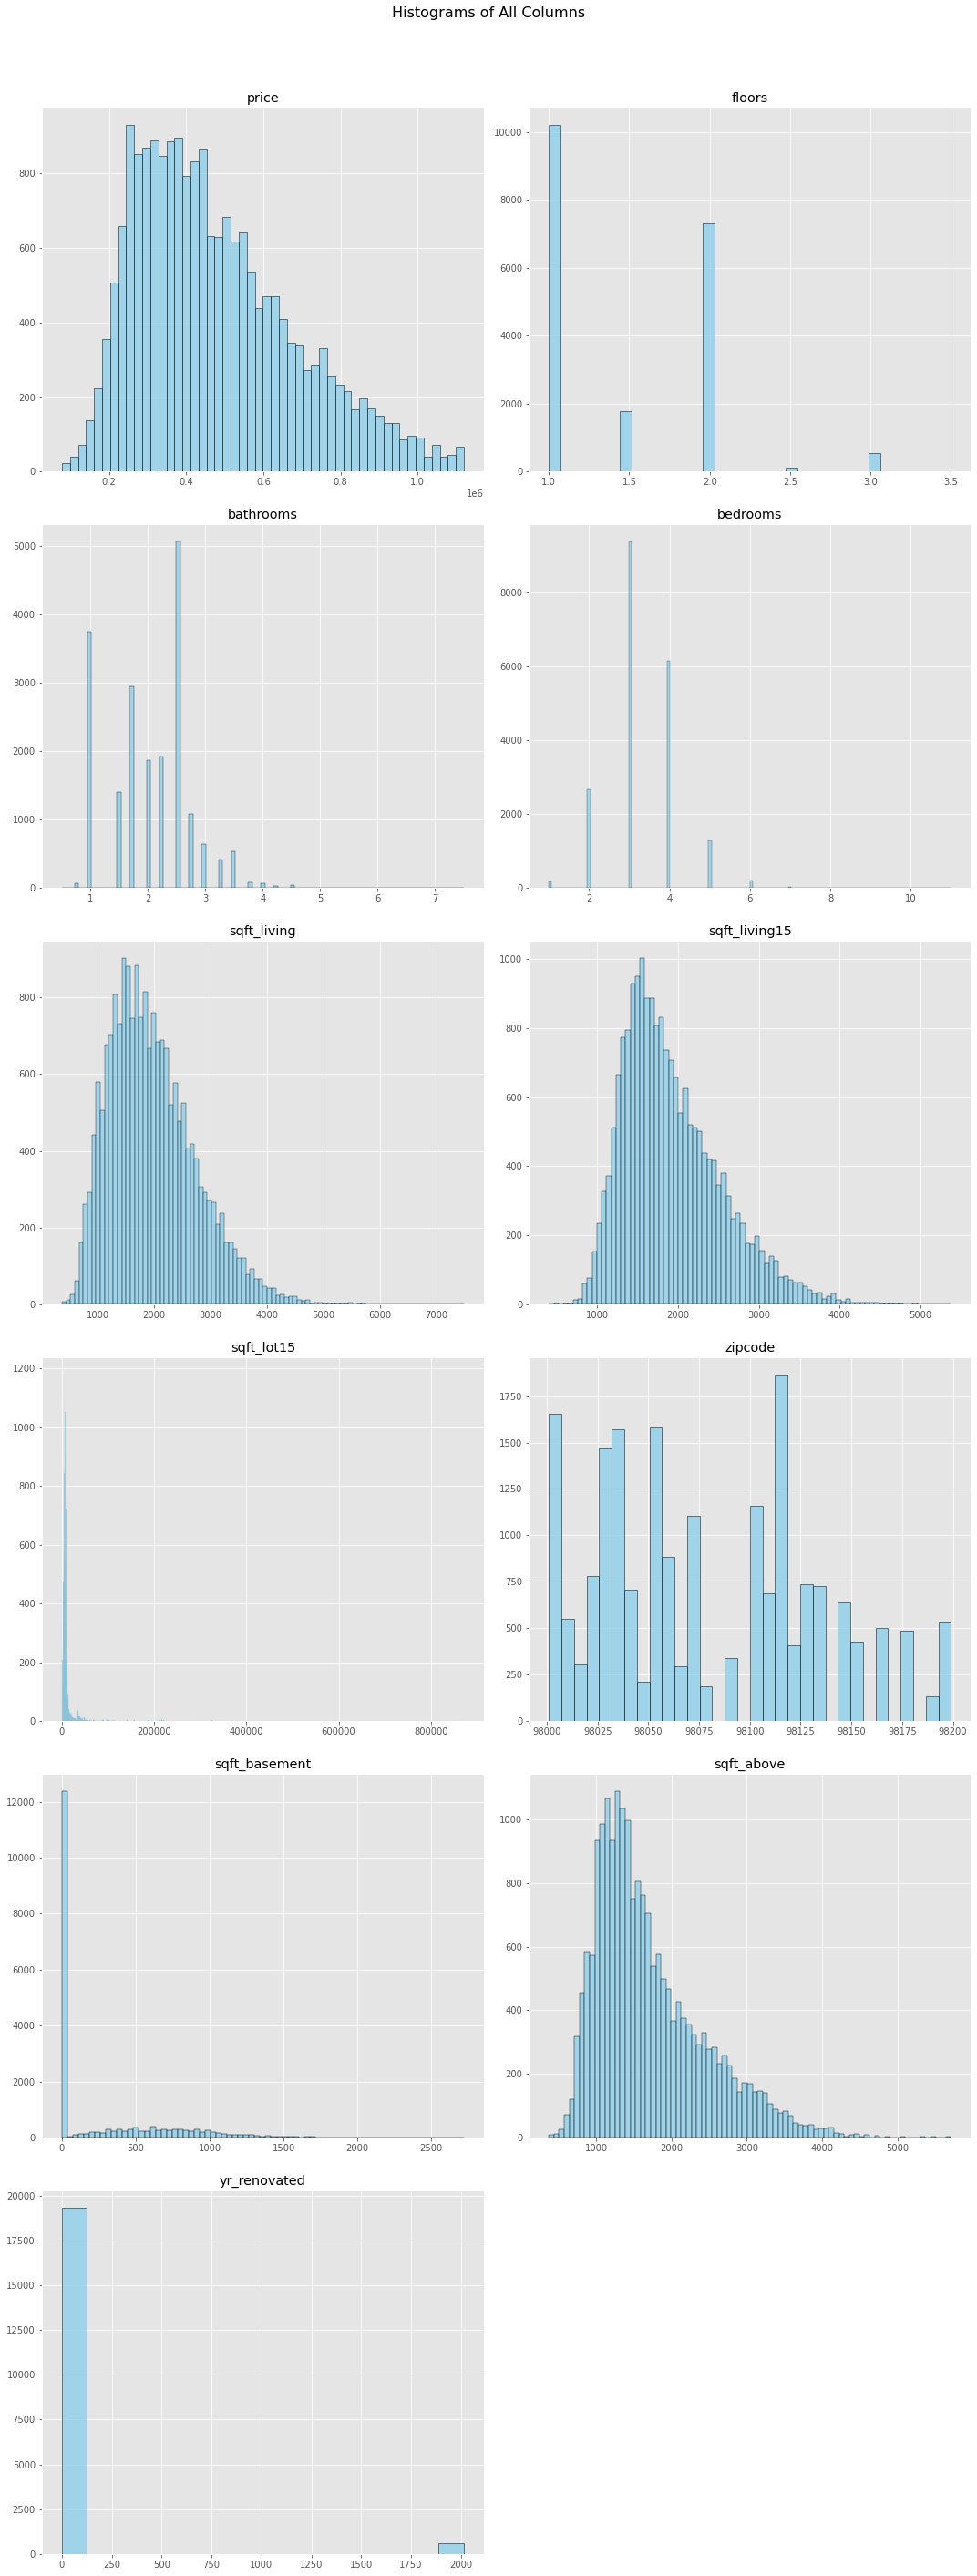

In [34]:
# Listing column to plot
columns_to_plot_ = ['price', 'floors', 
                    'bathrooms', 'bedrooms', 'sqft_living', 
                    'sqft_living15', 'sqft_lot15','zipcode',
                    'sqft_basement', 'sqft_above', 'yr_renovated']

# Plotting the histogram for the defined columns
histogram_plot(df_clean_2, 2, columns_to_plot_)

#### **Observations**
The image presents a series of histograms, each illustrating the distribution of values across various columns in a dataset. The first histogram for "price" reveals that most house prices cluster below 1 million, with a gradual decrease as prices rise. The "floors" histogram shows that the majority of houses have either 1 or 2 floors, with fewer houses having 1.5 or 3 floors and very few having more than 3 floors, indicating outliers. For "bathrooms," most houses have between 1 and 3 bathrooms, with very few having more. In the "bedrooms" histogram, most houses feature between 2 and 4 bedrooms, with an outlier showing a significantly higher number of bedrooms.

The "sqft_living" histogram indicates that most houses have between 1,000 and 3,000 square feet of living space, with a slight right skew showing some houses with significantly larger living spaces. Similarly, the "sqft_living15" histogram shows that the majority of houses in 2015 had between 1,000 and 3,000 square feet. The "sqft_lot15" histogram illustrates that most lots are small, with a sharp decline in frequency as lot size increases and some notable outliers with very large lot sizes. The "zipcode" histogram displays the distribution of houses across a wide range of zipcodes, with certain zipcodes having a higher concentration of houses.

The "sqft_basement" histogram shows that most houses do not have a basement, as indicated by a large number of zero values. For those with basements, the square footage is spread out, with fewer instances of larger basements. Lastly, the "sqft_above" histogram indicates that the majority of houses have between 1,000 and 3,000 square feet of above-ground living space, similar to the distribution seen in the "sqft_living" histogram. Overall, these histograms provide a comprehensive visual summary of the distributions of various house-related attributes in the dataset, with most distributions showing a right skew due to the presence of outliers with significantly higher values than the majority.

---
### **Bivariate Analaysis**
---

In [35]:
def plot_numerical_vs_price(df4, numerical_columns):
    """
    Plot numerical columns against the price column in a DataFrame.

    Parameters:
        df4 (DataFrame): The DataFrame containing the data.
        numerical_columns (list): A list of numerical column names.

    Returns:
        None
    """
    num_cols = len(numerical_columns)
    rows = (num_cols + 2) // 3  # Adjust for odd number of columns
    plt.figure(figsize=(15, 5 * rows))
    for i, column in enumerate(numerical_columns):
        plt.subplot(rows, 3, i+1)
        sns.scatterplot(x=df4[column], y=df4['price'])
        plt.title(f'{column.capitalize()} vs Price')
        plt.xlabel(column.capitalize())
        plt.ylabel('Price')
    plt.tight_layout()
    return plt.show()

---

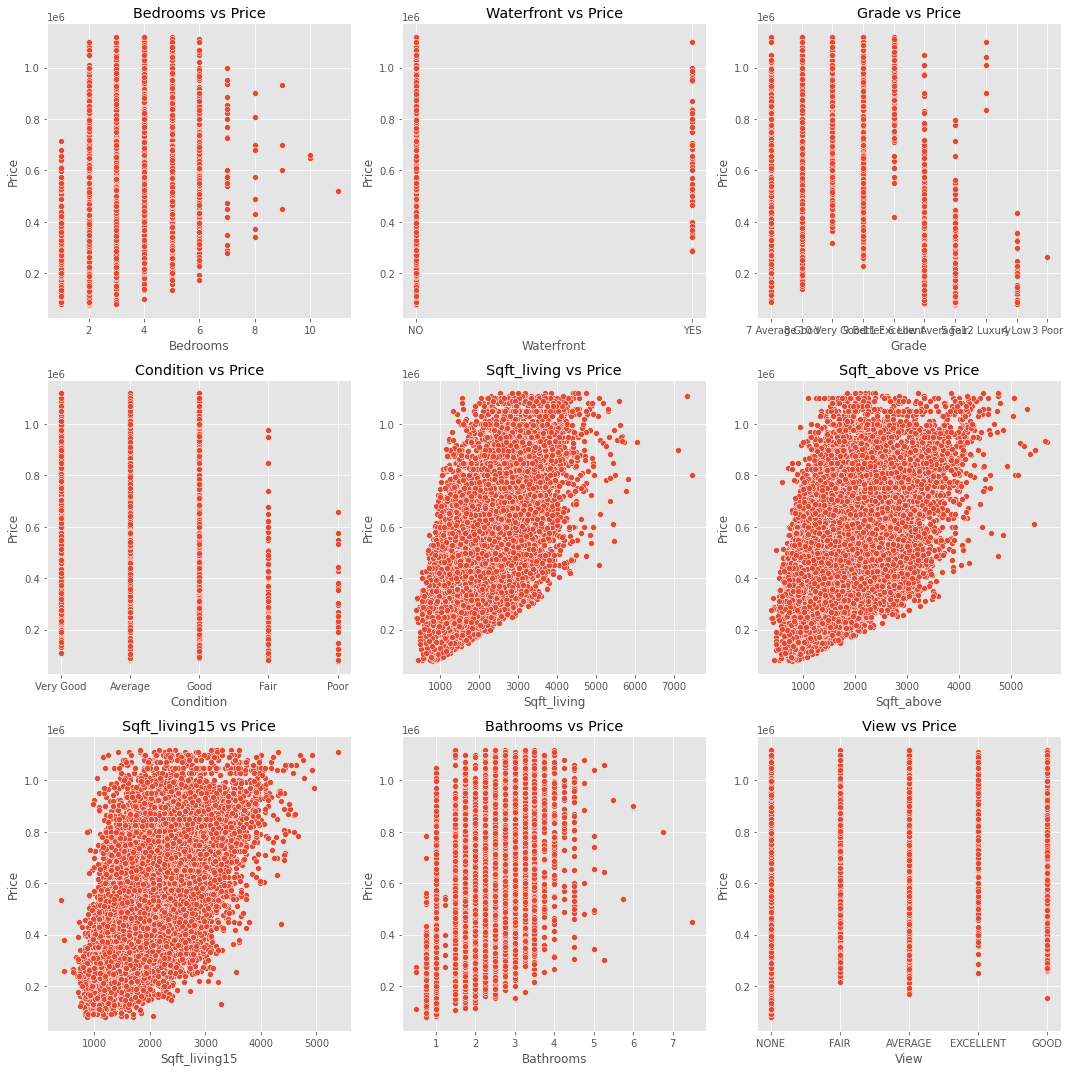

In [36]:
# Listing column to plot
columns_to_plot_ = ['bedrooms','waterfront','grade',
                    'condition','sqft_living','sqft_above',
                    'sqft_living15','bathrooms','view']

#relationships between our target variable and other independent variables in the dataset
plot_numerical_vs_price(df_clean_2, columns_to_plot_)

---
### **Categorical Data**
---

#### **Plotting Categoricals**

<ipython-input-37-1f024d862ef0>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='price', data=df4, ax=ax, ci=None)


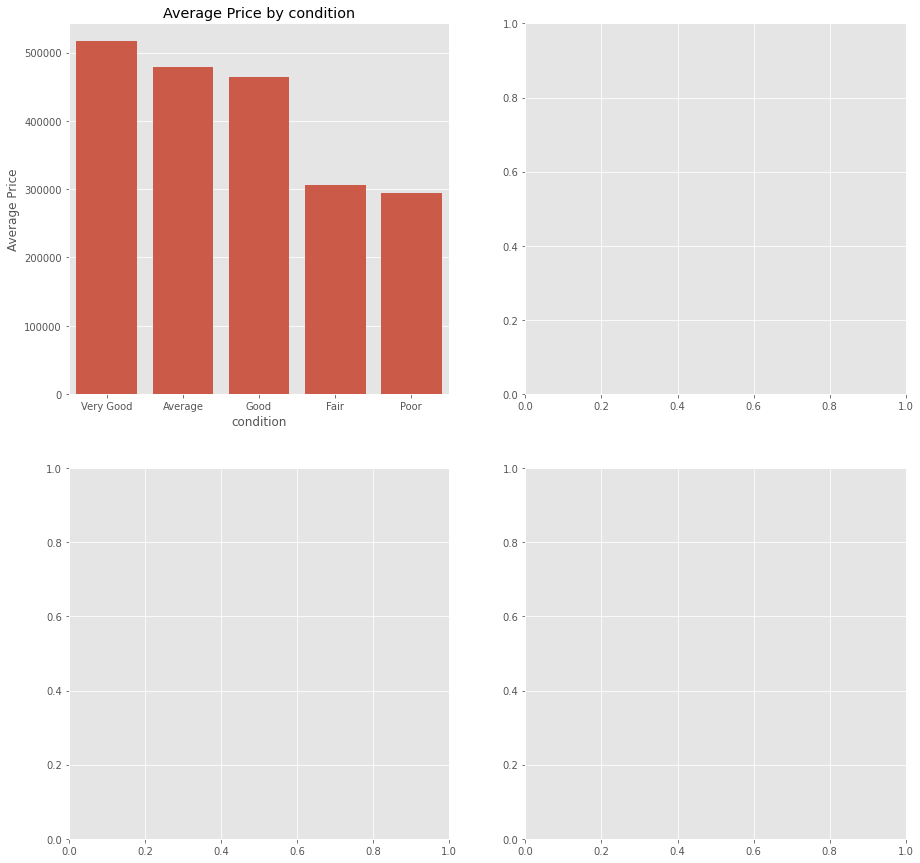

<ipython-input-37-1f024d862ef0>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='price', data=df4, ax=ax, ci=None)
<ipython-input-37-1f024d862ef0>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='price', data=df4, ax=ax, ci=None)


In [37]:

# List of categorical columns to plot
categorical_columns = ['condition', 'grade', 'view']

def barplot_plot(df4, number_of_columns, columns_to_plot):

    # Creating subplots
    num_columns = len(columns_to_plot)

    # Number of rows and columns for subplots
    ncols = number_of_columns
    nrows = math.ceil(num_columns/ ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*num_columns))
    axes = axes.flatten()

    # Plot each categorical column against 'price'
    for ax, col in zip(axes, categorical_columns):
        sns.barplot(x=col, y='price', data=df4, ax=ax, ci=None)
        ax.set_title(f'Average Price by {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Average Price')
        plt.show()
    return plt.show()

barplot_plot(df_clean_2,2,categorical_columns)

--- 
### Defining one Hote Encoding
--- 

In [74]:
# Define one-hot encoding categorical functions
def one_hot_encode(df5, catcols):
    '''Returns df5 with dummy vars and drops original column'''
    
    # Create DataFrame with above columns
    dfonehot = df5[catcols].astype('category')
    
    # Get dummy variables and drop first one to not create dependency
    dfonehot = pd.get_dummies(dfonehot, drop_first = True, dtype=int)
    
    # Recreate DataFrame with one-hot encoded variables
    df5 = pd.concat([df5,dfonehot], axis=1)
    
    # Drop columns where we have done one-hot encoding
    df5 = df5.drop(catcols, axis = 1)
        
    return df5

---

In [75]:
columns=["waterfront",'view','condition', "grade"]

# Apply one_hot encoding to king_County_df categorical columns
king_county_transform = one_hot_encode(df_clean_2, columns)
king_county_transform

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,...,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,2014-06-25,640000.0,3,1.75,1620,6000,1.0,1040,580.0,1947,...,1,0,0,0,0,0,0,1,0,0
1,2014-08-21,520000.0,11,3.00,3000,4960,2.0,2400,600.0,1918,...,0,0,0,0,0,0,0,1,0,0
2,2014-10-29,650000.0,10,2.00,3610,11914,2.0,3010,600.0,1958,...,0,0,0,0,0,0,0,1,0,0
3,2014-12-29,660000.0,10,3.00,2920,3745,2.0,1860,1060.0,1913,...,0,0,0,0,0,0,0,1,0,0
4,2014-08-11,450000.0,9,7.50,4050,6504,2.0,4050,0.0,1996,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19946,2014-06-04,135000.0,1,1.00,790,13062,1.0,790,0.0,1942,...,0,0,0,0,0,0,1,0,0,0
19947,2014-10-04,330600.0,1,1.00,580,1799,1.0,580,0.0,1908,...,0,0,0,0,0,0,0,1,0,0
19948,2014-09-15,110000.0,1,1.00,640,10280,1.0,640,0.0,1920,...,0,0,0,0,0,1,0,0,0,0
19949,2014-08-14,350000.0,1,1.00,900,6380,1.0,900,0.0,1947,...,0,0,0,0,0,0,1,0,0,0


---
#### **5. Multivariate Analysis**
---

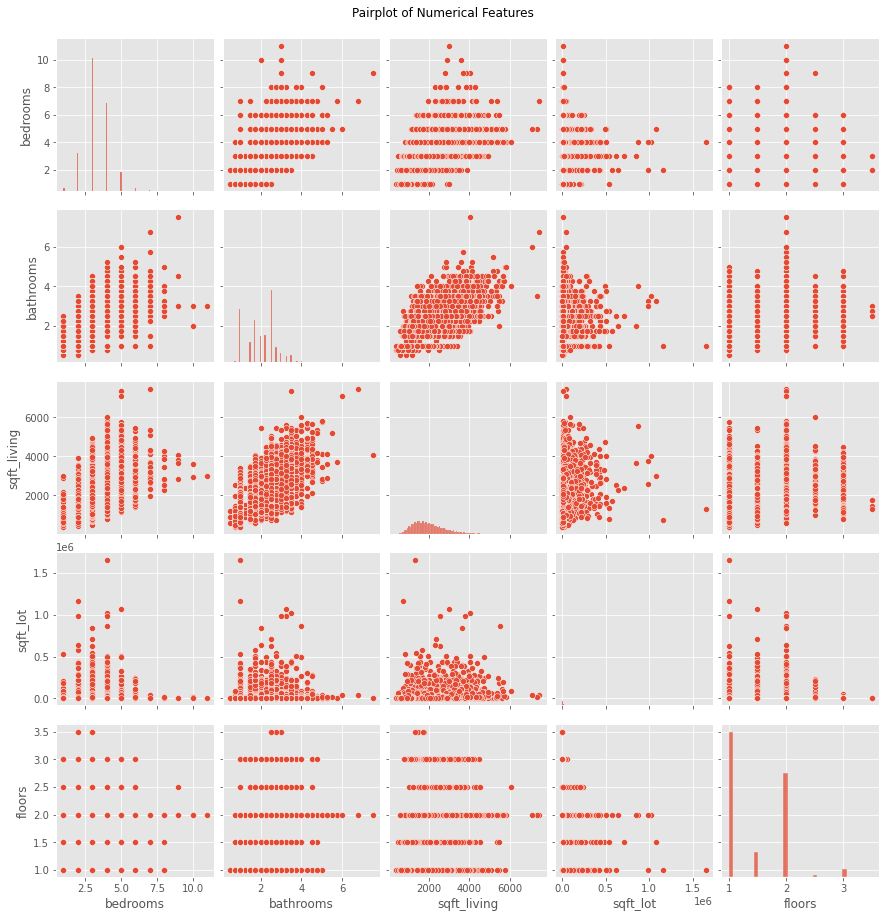

In [39]:
#Pairplot for visualizing relationships between numerical features

sns.pairplot(df_clean_2, vars=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

---
##### **Checking for Collineality**
---

In [41]:
# Correlation Coefficient
df_clean_4 = df_clean_2[numerical_columns]
corr = df_clean_4.corr()
corr

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
date,1.000000,-0.007669,-0.013243,-0.034186,-0.034852,0.002745,-0.021351,-0.027902,-0.016345,-0.001994,-0.018654,0.002318,-0.032794,-0.000243
price,-0.007669,1.000000,0.300120,0.454820,0.621665,0.093743,0.273080,0.530346,0.233409,0.060774,0.083512,-0.018195,0.562170,0.083418
bedrooms,-0.013243,0.300120,1.000000,0.504272,0.600943,0.025744,0.161700,0.478085,0.287209,0.168438,0.002552,-0.151836,0.381805,0.022661
bathrooms,-0.034186,0.454820,0.504272,1.000000,0.715848,0.065266,0.503515,0.637828,0.220457,0.545729,0.025399,-0.205881,0.528664,0.066102
sqft_living,-0.034852,0.621665,0.600943,0.715848,1.000000,0.158546,0.340303,0.853705,0.374393,0.354431,0.019994,-0.202903,0.737638,0.173498
sqft_lot,0.002745,0.093743,0.025744,0.065266,0.158546,1.000000,-0.017566,0.162317,0.011342,0.042088,0.006833,-0.129533,0.141882,0.705930
floors,-0.021351,0.273080,0.161700,0.503515,0.340303,-0.017566,1.000000,0.528363,-0.296103,0.511298,-0.003124,-0.063962,0.268348,-0.022234
sqft_above,-0.027902,0.530346,0.478085,0.637828,0.853705,0.162317,0.528363,1.000000,-0.163262,0.462437,-0.001940,-0.270150,0.717026,0.176860
sqft_basement,-0.016345,0.233409,0.287209,0.220457,0.374393,0.011342,-0.296103,-0.163262,1.000000,-0.151949,0.041334,0.096631,0.120719,0.013776
yr_built,-0.001994,0.060774,0.168438,0.545729,0.354431,0.042088,0.511298,0.462437,-0.151949,1.000000,-0.195914,-0.342803,0.361994,0.062310


---
##### Heat Map
---


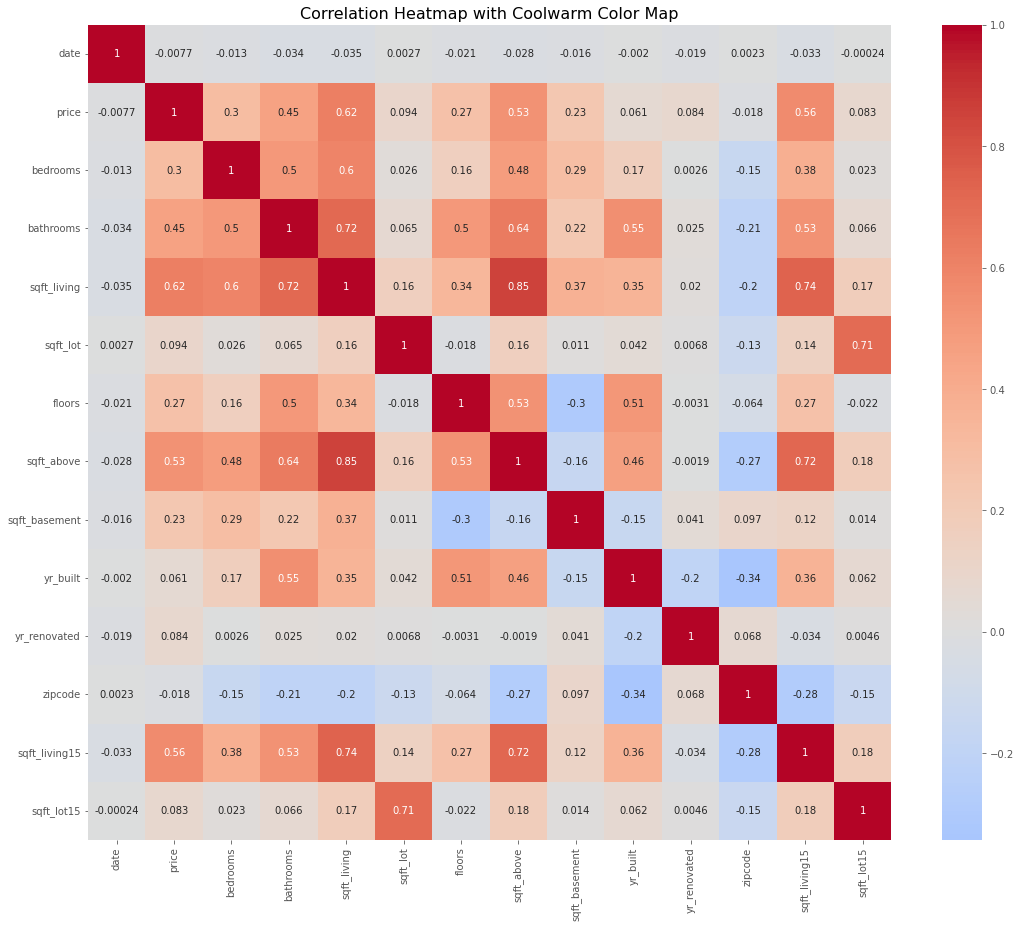

In [42]:
#plotting the covariance matrix on a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr, center=0, annot=True, cmap='coolwarm');  # Added 'cmap' argument for coolwarm color map
plt.title('Correlation Heatmap with Coolwarm Color Map', fontsize=16)
plt.show()

---

In [43]:
# Calculate the correlation matrix
correlation_matrix = df_clean_2[numerical_columns].corr().abs()

# Identify pairs of features with correlation > 0.75
high_corr_var = (correlation_matrix > 0.75) & (correlation_matrix != 1.0)

# Extract pairs
high_corr_pairs = high_corr_var.stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs[0]].drop(0, axis=1)
high_corr_pairs.columns = ['Feature1', 'Feature2']

print("Highly correlated pairs of features (correlation > 0.7):")
print(high_corr_pairs)

Highly correlated pairs of features (correlation > 0.7):
        Feature1     Feature2
63   sqft_living   sqft_above
102   sqft_above  sqft_living


---
*Question 1: What features have the highest correlation to the home price?*
---
In general, a correlation value above 0.75 is considered high. Although the dataset does not contain any high correlations with the price above 0.75, there are several features that exhibit moderately strong correlations. The variables sqft_living, grade, sqft_above, and demonstrate the significantly high correlation between themselves.

In [44]:
#Dropping some columns to fix the problem of muticollinearity.
df_clean_5 = df_clean_4.drop(columns=['date','sqft_above', 'sqft_living']).copy()
df_clean_5

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,640000.0,3,1.75,6000,1.0,580.0,1947,0.0,98103,1330,4700
1,520000.0,11,3.00,4960,2.0,600.0,1918,1999.0,98106,1420,4960
2,650000.0,10,2.00,11914,2.0,600.0,1958,0.0,98006,2040,11914
3,660000.0,10,3.00,3745,2.0,1060.0,1913,0.0,98105,1810,3745
4,450000.0,9,7.50,6504,2.0,0.0,1996,0.0,98144,1448,3866
...,...,...,...,...,...,...,...,...,...,...,...
19946,135000.0,1,1.00,13062,1.0,0.0,1942,0.0,98168,1240,7137
19947,330600.0,1,1.00,1799,1.0,0.0,1908,2005.0,98117,1260,4000
19948,110000.0,1,1.00,10280,1.0,0.0,1920,0.0,98126,1090,9000
19949,350000.0,1,1.00,6380,1.0,0.0,1947,0.0,98125,1830,6380


___
## **Modelling**

----
#### Defining the Multiple linear regression Model
----

In [45]:
def Multi_linear_regression_model(df, dependent_var):
    # Features and target variable
    X = df.drop([dependent_var], axis=1)
    y = df[dependent_var]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the scaler
    scaler = StandardScaler()
    
    #Computes the parameters (mean and standard deviation)
    scaler.fit(X_train)

    # Scaling training data using the computed mean and standard deviation
    X_train_scaled = scaler.transform(X_train)

    # Scaling test data using the same computed mean and standard deviation
    X_test_scaled = scaler.transform(X_test)

    # Initialize linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    # Compute Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

    # Print model coefficients
    coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
    print(coefficients)
    return [mse , r2]

___
#### Defining the Linear Regression Model
___

In [76]:
def linear_regression_model(df, y, X):
    
    y = df[y]
    X = df[[X]]
  
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the scaler
    scaler = StandardScaler()
    
    #Computes the parameters (mean and standard deviation)
    scaler.fit(X_train)

    # Scaling training data using the computed mean and standard deviation
    X_train_scaled = scaler.transform(X_train)

    # Scaling test data using the same computed mean and standard deviation
    X_test_scaled = scaler.transform(X_test)

    # Initialize linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    # Compute Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

    # Print model coefficients
    coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
    print(coefficients)
    return [mse , r2]



---
---

In [77]:
linear_regression_model(df_clean_5, 'price', 'floors')

Mean Absolute Error: 159759.17321887257
Mean Squared Error: 38840491815.574135
R^2 Score: 0.06940887044903365
         Coefficient
floors  57418.322415


[38840491815.574135, 0.06940887044903365]

In [71]:
for i 
Multi_linear_regression_model(df_clean_5,'price')

Mean Absolute Error: 120480.2878747258
Mean Squared Error: 23450346292.878532
R^2 Score: 0.4381460371647312
                 Coefficient
bedrooms        -6054.153083
bathrooms       51508.191436
sqft_lot        11716.156827
floors          48989.034536
sqft_basement   29707.597101
yr_built       -66599.697709
yr_renovated     4236.431583
zipcode         12047.851847
sqft_living15  103406.286367
sqft_lot15      -5928.921982


[23450346292.878532, 0.4381460371647312]

---
---

### QUESTION 3 **Assess Model Accuracy and Disparities:**   
Compare the predicted house prices with the actual prices to identify any notable disparities. Perform residual analysis to understand and address any systematic errors or biases in the model's predictions. 

#### Implementation  

1. Plot Predicted vs. Actual Prices